In [19]:
#!/usr/bin/env python
#title           :testClassifier.py
#description     :Test classifier and plot performance evaluation.
#author          :siyu zhu
#date            :March 17, 2014
#version         :0.1
#usage           :python testClassifier.py
#notes           :
#python_version  :2.7

#==============================================================================
# import modules
import numpy
import scipy
import os
from scipy.ndimage import binary_dilation, binary_erosion
import matplotlib.pyplot as plt
from sklearn import metrics, preprocessing
# define threshold Scaling 
def threScale(t):
    # make threshold plotable by making its value from 0 ~ 1 and length equal to precision and recall vector
    t = numpy.append(t, t[-1])
    t = t - numpy.min(t)
    t = t / numpy.max(t)
    return t

# define F metric 
def fmetric(pre, rec):
    # compute f1 metric from precision and recall vector;
    f = 2*pre*rec/(pre+rec)
    return f

In [20]:
imdir = './mask/'
labeldir = '../icdar2003/icdar2003/SceneTrialTest/BBImage/ryoungt_13.08.2002/'
filelist = os.listdir(imdir)
# filelist = ['dpct0024.jpg', 'dPICT0034.JPG', 'dPICT0041.JPG', 'dPICT0042.JPG', 'fdPICT0021.JPG'
#            ,'PICT0095.JPG', 'PICT0098.JPG', 'rPICT0009.JPG', 'rPICT0022.JPG', 'tPICT0036.JPG', 'vPICT0008.JPG', 'vPICT0020.JPG']

n = 0
for filename in filelist:
    if filename.endswith('jpg'):
        pass
    elif filename.endswith('JPG'):
        pass
    else:
        print filename,'not a valid filename'
        continue  
    imfile = os.path.join(imdir, filename)
    labelfile = os.path.join(labeldir, filename)
    im = scipy.misc.imread(imfile, flatten = True) # read image detection map
    im = numpy.ndarray.flatten(im) # prediction image
    n = n + im.shape[0]

pred = numpy.empty(n, dtype = numpy.float32)
label = numpy.empty(n, dtype = numpy.float32)

n = 0
for filename in filelist:
    if filename.endswith('jpg'):
        pass
    elif filename.endswith('JPG'):
        pass
    else:
        print filename,'not a valid filename'
        continue  
    imfile = os.path.join(imdir, filename)
    labelfile = os.path.join(labeldir, filename)
    im = scipy.misc.imread(imfile, flatten = True) # read image detection map
    im0 = scipy.misc.imread(labelfile, flatten = True) # read label image    
    im = numpy.float32(im)
    im = im/numpy.max(im)
    im0 = im0 > 128
    # im0 = binary_dilation(im0, iterations=18)
    im0 = numpy.uint8(im0)
    im = numpy.ndarray.flatten(im) # prediction image
    im0 = numpy.ndarray.flatten(im0) # label image
    pred[n: n+im.shape[0]] = im
    label[n: n+im.shape[0]] = im0
    
    print 'file name:', filename, 'index:', n, n+im.shape[0]
    n = n + im.shape[0]

file name: fdPICT0021.JPG index: 0 286720
file name: dPICT0034.JPG index: 286720 593920
file name: tPICT0036.JPG index: 593920 1822720
file name: rPICT0001.JPG index: 1822720 3051520
file name: rPICT0022.JPG index: 3051520 4280320
file name: dPICT0020.JPG index: 4280320 4545920
file name: vPICT0025.JPG index: 4545920 5774720
file name: dpct0024.jpg index: 5774720 6378205
file name: dPICT0041.JPG index: 6378205 6685405
file name: vPICT0008.JPG index: 6685405 7914205
file name: PICT0095.JPG index: 7914205 8221405
file name: fdPICT0022.JPG index: 8221405 8528605
file name: rPICT0009.JPG index: 8528605 9040300
file name: dpCT0001.jpg index: 9040300 10269100
file name: PICT0098.JPG index: 10269100 10576300
file name: vPICT0020.JPG index: 10576300 11805100
file name: dpCT0002.jpg index: 11805100 13033900
file name: dPICT0042.JPG index: 13033900 13341100
file name: rPICT0005.JPG index: 13341100 14569900
file name: nPICT0006.JPG index: 14569900 15377182
file name: dPICT0068.JPG index: 15377182

In [21]:
fpr, tpr, t = metrics.roc_curve(label, pred, pos_label = 1)
pre, rec, thre = metrics.precision_recall_curve(label, pred, pos_label=1)
thre = threScale(thre)

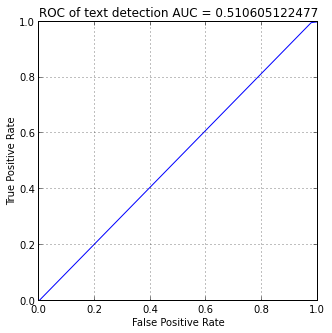

In [22]:
# ROC curve for training and testing
area = metrics.auc(fpr, tpr)
fig, ax = plt.subplots(figsize=(5, 5))
p1 = plt.plot(fpr, tpr, label = 'testing')
plt.grid(True)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(r'ROC of text detection AUC = ' + str(area))
# ax.legend(loc = 1)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
plt.savefig('image_roc.png')
plt.savefig('image_roc.pdf')

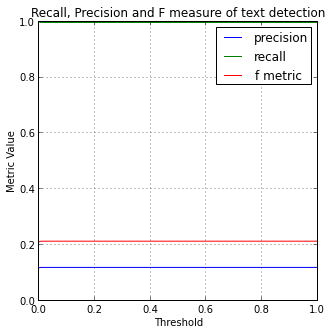

In [23]:
# compute the precision, recall and f measure for testing
fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(thre, pre, label = 'precision')
plt.plot(thre, rec, label = 'recall')
plt.plot(thre, fmetric(pre, rec), label = 'f metric')
plt.grid(True)
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title(r'Recall, Precision and F measure of text detection')
ax.legend(loc = 1)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
plt.savefig('image_prf.png')
plt.savefig('image_prf.pdf')

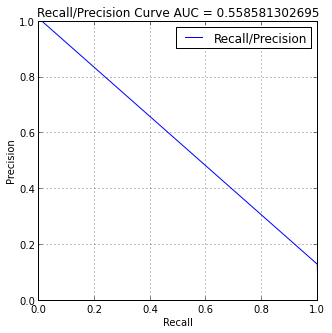

In [24]:
# compute the precision, recall and f measure for testing
pre = numpy.unique(pre)
area = metrics.auc(rec, pre)
fig, ax = plt.subplots(figsize=(5, 5))
pre1 = pre + pre[::-1]*0.1
pre1[0] = 0
plt.plot(rec, pre1, label = 'Recall/Precision')
plt.grid(True)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(r'Recall/Precision Curve AUC = ' + str(area))
ax.legend(loc = 1)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
plt.savefig('image_prc.png')
plt.savefig('image_prc.pdf')

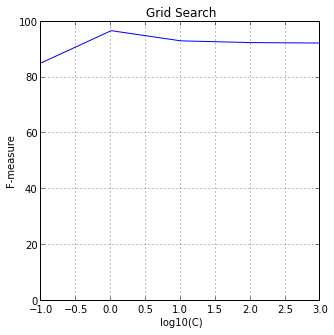

In [25]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.plot([-1, 0, 1, 2, 3], [85.32, 96.82, 93.17, 92.55, 92.39])
plt.grid(True)
plt.xlabel('log10(C) ')
plt.ylabel('F-measure')
plt.title('Grid Search')
ax.legend(loc = 1)
ax.set_xlim([-1, 3])
ax.set_ylim([0, 100])
plt.savefig('gridSearch.png')
plt.savefig('gridSearch.pdf')

(0, 1)

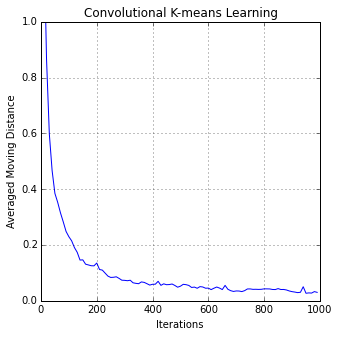

In [10]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
# ROC curve for training and testing
error = numpy.load('../python/cluster/codeBook1/codeBookErr.npy')
it = range(0, 1000, 10)
fig, ax = plt.subplots(figsize=(5, 5))
p1 = plt.plot(it, error, label = 'ckmeans')
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Averaged Moving Distance')
plt.title(r'Convolutional K-means Learning')
# ax.legend(loc = 1)
ax.set_xlim([0, 1000])
ax.set_ylim([0, 1])

In [8]:
error

array([ 2.64356509,  1.3410535 ,  0.8661411 ,  0.59860718,  0.46683639,
        0.38498309,  0.3529346 ,  0.31511605,  0.28269991,  0.24861721,
        0.22976764,  0.21501891,  0.19085747,  0.17370895,  0.14606486,
        0.14675538,  0.13126377,  0.12855257,  0.12571197,  0.1252804 ,
        0.13534055,  0.11214144,  0.11001968,  0.09922846,  0.08856508,
        0.08374953,  0.08432722,  0.08606453,  0.08031926,  0.07377267,
        0.07331379,  0.07199327,  0.07372506,  0.06455693,  0.06261799,
        0.06126134,  0.06765423,  0.06602223,  0.06129113,  0.05632993,
        0.05921429,  0.0594877 ,  0.06987266,  0.05531219,  0.0608479 ,
        0.05770855,  0.05820909,  0.06020138,  0.05496863,  0.04875257,
        0.05239082,  0.05907517,  0.05782303,  0.05509612,  0.04780181,
        0.04916446,  0.04492293,  0.05078361,  0.04955493,  0.04510196,
        0.04550709,  0.04014786,  0.04506651,  0.04937735,  0.04560411,
        0.04024808,  0.05525077,  0.04130126,  0.03634192,  0.03